In [1]:
%matplotlib nbagg

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from IPython.display import display, Math, Latex

vins = load_wine()
Data = pd.DataFrame(vins['data'],columns=vins['feature_names'])
Data['class'] = vins['target']

Le jeu de donnée est le résulat d'une analyse chimique de vins produit par 3 cultivateurs. Chaque ligne représente un vin testé où la variable **class** donne numéro du cultivateur qui la produit et les autres variables donnent le résultat de l'analyse chimique de ce vin.

Si vous avez importé les données avec le module sklearn, vous pouvez avoir une description (en anglais) du jeu de donnée en utilisant le code suivant:

In [2]:
print(vins['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

(1). Importez les données sous forme d'un dataframe. Familiarisez-vous avec le tableau des données : Vérifiez la taille du tableau, regardez le type des différentes variables etc.

In [4]:
Data.shape

(178, 14)

In [5]:
Data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                             int32
dtype: object

In [7]:
Data.index

RangeIndex(start=0, stop=178, step=1)

In [49]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
class                           178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.8 KB


In [3]:
Data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


 ##### Distribution marginale
 ---

(2). Calculez les statistiques d'ordre de la variable **flavanoids**. 

In [61]:
Data.sort_values(by='flavanoids')['flavanoids']
flavanoids_serie = Data['flavanoids']
np.percentile(flavanoids_serie, q=range(1,100+1))
# flavanoids_serie.count()==flavanoids_serie.size


array([ 0.47  ,  0.4854,  0.5   ,  0.5108,  0.5455,  0.5662,  0.58  ,
        0.5832,  0.6   ,  0.607 ,  0.6394,  0.66  ,  0.68  ,  0.6878,
        0.7   ,  0.7532,  0.7618,  0.7972,  0.83  ,  0.872 ,  0.9268,
        0.9882,  1.0697,  1.0948,  1.205 ,  1.25  ,  1.25  ,  1.28  ,
        1.3033,  1.324 ,  1.36  ,  1.4028,  1.4764,  1.57  ,  1.5795,
        1.59  ,  1.6049,  1.64  ,  1.69  ,  1.738 ,  1.7557,  1.807 ,
        1.8411,  1.9116,  1.979 ,  2.0184,  2.03  ,  2.0396,  2.1046,
        2.135 ,  2.17  ,  2.1908,  2.2343,  2.2558,  2.2635,  2.2724,
        2.3256,  2.3964,  2.43  ,  2.46  ,  2.5097,  2.5274,  2.5402,
        2.5884,  2.6305,  2.6482,  2.65  ,  2.6608,  2.68  ,  2.689 ,
        2.7235,  2.76  ,  2.7821,  2.79  ,  2.875 ,  2.8952,  2.9129,
        2.9212,  2.9649,  2.98  ,  2.99  ,  3.    ,  3.0273,  3.0368,
        3.078 ,  3.1422,  3.15  ,  3.17  ,  3.1853,  3.233 ,  3.2514,
        3.2868,  3.3627,  3.3938,  3.4975,  3.5584,  3.6607,  3.713 ,
        3.7914,  5.0

(3). En déduire les quartiles de cette variable. Quelle statistique de dispersion pouvez-vous calculer à partir de vos résultats précédents ? Calculez cette statistique.

Voici les quartiles:

In [62]:
q25 = np.percentile(flavanoids_serie,25)
Math('q_{{25}}={}'.format(q25))

<IPython.core.display.Math object>

In [63]:
q75 = np.percentile(flavanoids_serie,75)
Math('q_{{75}}={}'.format(q75))

<IPython.core.display.Math object>

Des quartiles, on peut déduire l'écart interquartiles:

In [64]:
eiq2575=q75-q25
Math('\Delta=q_{{75}}-q_{{25}}={}'.format(eiq2575))

<IPython.core.display.Math object>

(4). Quelle représentation graphique vous permettrait de répondre à la question 3 ? Affichez ce graphique.

La représentation utile ici est le **boxplot**.

<IPython.core.display.Javascript object>


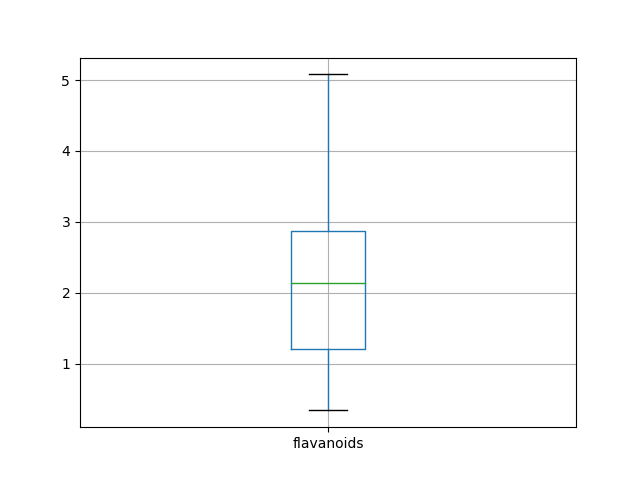

In [67]:
pd.DataFrame(flavanoids_serie).boxplot()

(5). Calculez la distribution (les valeurs et fréquences) de la variable **flavanoids**. Définissez une fonction qui prends en paramètres un entier r, des valeurs et des fréquences et qui renvoie le moment centré d'ordre r. Utilisez cette fonction pour calculer la variance de la variable **flavanoids** à partir de sa distribution.

Valeurs et fréquences:

In [71]:
flavanoids_freq = flavanoids_serie.value_counts()
flavanoids_freq

2.65    4
0.58    3
2.68    3
0.60    3
1.25    3
2.03    3
0.92    2
0.66    2
2.43    2
2.98    2
0.47    2
2.26    2
1.69    2
2.17    2
2.79    2
2.76    2
2.92    2
3.17    2
1.36    2
3.39    2
3.15    2
1.59    2
1.84    2
2.69    2
2.99    2
3.00    2
1.75    2
0.68    2
1.28    2
0.76    2
       ..
0.34    1
0.96    1
1.32    1
1.20    1
3.93    1
0.80    1
0.61    1
3.69    1
3.56    1
2.97    1
2.89    1
2.45    1
1.92    1
0.69    1
0.52    1
3.64    1
5.08    1
2.86    1
2.91    1
1.79    1
2.21    1
0.84    1
3.04    1
3.10    1
3.40    1
2.78    1
1.02    1
1.30    1
2.90    1
3.25    1
Name: flavanoids, Length: 132, dtype: int64

Fonction qui calcule le moment centré d'ordre r:

In [72]:
def moment_centre(freq,r):
    pass

Variance:

In [74]:
moment_centre(flavanoids_freq,2)

 ##### Distribution conditionnelle
 ---

(6). Calculez la moyenne conditionnelle et la variance conditionnelle de la variable **alcohol** sachant que la variable **class** vaut 0, 1 et 2. Interpretez les résultats.

(7). Affichez sur une même figure l'histogramme de la distribution de la variable **alcohol** sachant que la variable **class** vaut 0, 1 et 2 (conseil: utilisez le paramètre **alpha** de la fonction hist pour mieux voir les superpositions). En quoi cette représentation graphique confirme vos précédents résultats ?

(8). Calculez les fréquences de la variable **alcohol** pour les intervalles (10.,12.5], (12.5,13.5] et (13.5,15.] sachant que la variable **class** vaut 0, 1 et 2. (La notation (a,b] signifie que l'intervalle est ouvert à gauche et fermé à droite)

 ##### Distribution jointe et statistiques de dépendance
 ---

(9). Affichez le nuage de points des variables **flavanoids** et **total_phenols** et le nuage de points des variables **flavanoids** et **nonflavanoid_phenols** sur des figures différentes (mais dans une même fenêtre). Interpretez ces deux graphiques.

(10). Quelle statistique utiliseriez-vous pour justifier votre réponse à la question précédente ? Justifiez votre choix et calculez la valeur de cette statistique pour les deux cas.

(11). À partir des résultats de la question 8, comment feriez-vous pour calculer la distribution jointe des variables **alcohol** et **class** ? (où les valeurs sont 0, 1 et 2 pour la variable class et les intervalles (10.,12.5], (12.5,13.5] et (13.5,15.] pour la variable alcohol) Calculez cette distribution jointe. Faites le produit entre la distribution marginale de la variable **alcohol** et celle de la variable **class**. Qu'est-ce que vous en concluez ?

(12). Ecrivez une fonction **scatter_matrix** qui trace les nuages de points de toutes les variables du tableau de données passé à la fonction en argument, où les graphiques sont organisés en forme de matrice (c'est à dire que le nuage de points des variables i et j se trouve sur la ième ligne et la jème ligne dans la fenêtre). Appliquez cette fonction à votre tableau de données et comparez votre résultat à la matrice de corrélations.

(13). Imaginez que l'on veuille maintenant prédire la variable **class** en fonction des autres variables. Dans ce cas, quelles variables seraient utiles pour faire cette prédiction ? Justifiez votre choix.